<a href="https://colab.research.google.com/github/akk-026/cifar-10/blob/main/cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
X_train.shape #each image is of 32*32 dimensions and 3 channels R,G,B

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_test.shape

(10000, 1)

In [ ]:
Y_train[:15] #its a 2d array we want a 1d array

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9]], dtype=uint8)

In [ ]:
Y_train=Y_train.reshape(-1,) #The -1 is a placeholder that tells numpy to
# automatically calculate the size of that dimension based on the
# original array's size and the other specified dimensions.
#The comma after the -1 indicates that you are specifying a shape with one dimension.

In [ ]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
Y_test=Y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

x: This is expected to be an array of images (like X_train or X_test).

y: This is expected to be an array of labels (like Y_train or Y_test).

index: This is an integer representing the index of the image and its corresponding label that you want to plot.

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

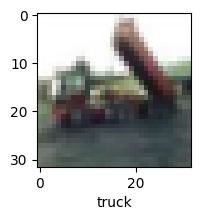

In [ ]:
plot_sample(X_train,Y_train,2)

In [ ]:
X_train=X_train/255
X_test=X_test/255 #normalising the data

ANN

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.3040 - loss: 1.9336
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4178 - loss: 1.6509
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 87ms/step - accuracy: 0.4521 - loss: 1.5514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.4755 - loss: 1.4859
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 89ms/step - accuracy: 0.4942 - loss: 1.4314
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 89ms/step - accuracy: 0.5095 - loss: 1.3909
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - accuracy: 0.5186 - loss: 1.3637
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 86ms/step - accuracy: 0.5336 - loss: 1.3193
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 0.5480 - loss: 1.2908
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 85ms/step - accuracy: 0.5582 - loss: 1.2555


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(Y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.40      0.52      1000
           1       0.77      0.48      0.59      1000
           2       0.45      0.26      0.33      1000
           3       0.32      0.43      0.36      1000
           4       0.56      0.21      0.31      1000
           5       0.46      0.33      0.39      1000
           6       0.31      0.88      0.45      1000
           7       0.67      0.46      0.55      1000
           8       0.59      0.69      0.64      1000
           9       0.58      0.62      0.60      1000

    accuracy                           0.48     10000
   macro avg       0.54      0.48      0.47     10000
weighted avg       0.54      0.48      0.47     10000



In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
cnn.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,Y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.2057 - loss: 2.1556
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - accuracy: 0.3816 - loss: 1.7287
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.4556 - loss: 1.5135
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5083 - loss: 1.3894
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5489 - loss: 1.2843
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5722 - loss: 1.2169
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.5951 - loss: 1.1483
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6149 - loss: 1.0980
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.6391 - loss: 1.0453
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6518 - loss: 1.0045


In [ ]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6193 - loss: 1.1097


[1.1222331523895264, 0.6144000291824341]

In [ ]:
Y_pred=cnn.predict(X_test)
Y_pred_classes=[np.argmax(element) for element in Y_pred]
print("Classification Report: \n",classification_report(Y_test,Y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.62      0.67      1000
           1       0.76      0.72      0.74      1000
           2       0.59      0.44      0.51      1000
           3       0.52      0.30      0.38      1000
           4       0.59      0.50      0.54      1000
           5       0.45      0.68      0.54      1000
           6       0.87      0.51      0.65      1000
           7       0.63      0.72      0.67      1000
           8       0.65      0.82      0.73      1000
           9       0.55      0.82      0.66      1000

    accuracy                           0.61     10000
   macro avg       0.63      0.61      0.61     10000
weighted avg       0.63      0.61      0.61     10000

